## Simple Sine Data


In [2]:
# First cell - Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

In [13]:
# Modified cell for dataset creation with influential exogenous variables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Parameters
n_timesteps = 365  # One year
trend_slope = 0.05  # Upward trend
seasonal_amplitude = 3
seasonal_period = 30  # Monthly seasonality
noise_std = 0.3
np.random.seed(42)  # For reproducibility

# Create time index
dates = pd.date_range('2020-01-01', periods=n_timesteps, freq='D')

# Generate base components
time_numeric = np.arange(n_timesteps)
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables first
# 1. Temperature (with seasonal pattern)
temp_seasonal = 15 + 10 * np.sin(2 * np.pi * time_numeric / 365 + np.pi)  # Opposite phase of seasonality
temp_noise = np.random.randn(n_timesteps) * 2
temperature = temp_seasonal + temp_noise

# 2. Calendar features
day_of_week = dates.dayofweek  # 0=Monday, 6=Sunday
is_weekend = (day_of_week >= 5).astype(int)
month = dates.month
day_of_week_sin = np.sin(2 * np.pi * day_of_week / 7)
day_of_week_cos = np.cos(2 * np.pi * day_of_week / 7)
day_of_month_sin = np.sin(2 * np.pi * dates.day / 30)
day_of_month_cos = np.cos(2 * np.pi * dates.day / 30)
month_sin = np.sin(2 * np.pi * month / 12)
month_cos = np.cos(2 * np.pi * month / 12)

# 3. Holidays (random holidays + fixed major holidays)
is_holiday = np.zeros(n_timesteps)
# Major holidays (approximate dates for demonstration)
major_holidays = [0, 31, 59, 120, 185, 245, 335, 358]  # Approx: Jan 1, Feb 1, Mar 1, May 1, Jul 5, Sep 2, Dec 1, Dec 24
for day in major_holidays:
    if day < n_timesteps:
        is_holiday[day] = 1

# Add some random holidays
random_holidays = np.random.choice(range(n_timesteps), size=10, replace=False)
is_holiday[random_holidays] = 1

# 4. Special event (e.g., promotion period)
is_promotion = np.zeros(n_timesteps)
promotion_periods = [(60, 75), (180, 195), (300, 315)]  # Three promotion periods
for start, end in promotion_periods:
    is_promotion[start:end] = 1

# Now make the target variable influenced by exogenous variables
# Temperature effect: higher temperature reduces the value
temp_effect = -0.2 * (temperature - 15)  # Normalized effect

# Weekend effect: weekends have different patterns
weekend_effect = 2.0 * is_weekend

# Holiday effect: holidays cause spikes
holiday_effect = 5.0 * is_holiday

# Promotion effect: promotions cause significant increases
promotion_effect = 8.0 * is_promotion

# Combine all effects with base components
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame with target and components
df = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
df.head()

,value,trend,seasonality,exog_effects,noise,temperature,is_weekend,is_holiday,is_promotion,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,month_sin,month_cos
2020-01-01,14.680948,10.00,0.000000,4.801314,-0.120366,15.993428,0,1.0,0.0,0.974928,-0.222521,0.207912,0.978148,0.5,0.866025
2020-01-02,10.909881,10.05,0.623735,0.089732,0.146413,14.551338,0,0.0,0.0,0.433884,-0.900969,0.406737,0.913545,0.5,0.866025
2020-01-03,11.604018,10.10,1.220210,-0.190232,0.474040,15.951161,0,0.0,0.0,-0.433884,-0.900969,0.587785,0.809017,0.5,0.866025
2020-01-04,13.371428,10.15,1.763356,1.494027,-0.035955,17.529863,1,0.0,0.0,-0.974928,-0.222521,0.743145,0.669131,0.5,0.866025
2020-01-05,14.694820,10.20,2.229434,2.231266,0.034119,13.843669,1,0.0,0.0,-0.781831,0.623490,0.866025,0.500000,0.5,0.866025


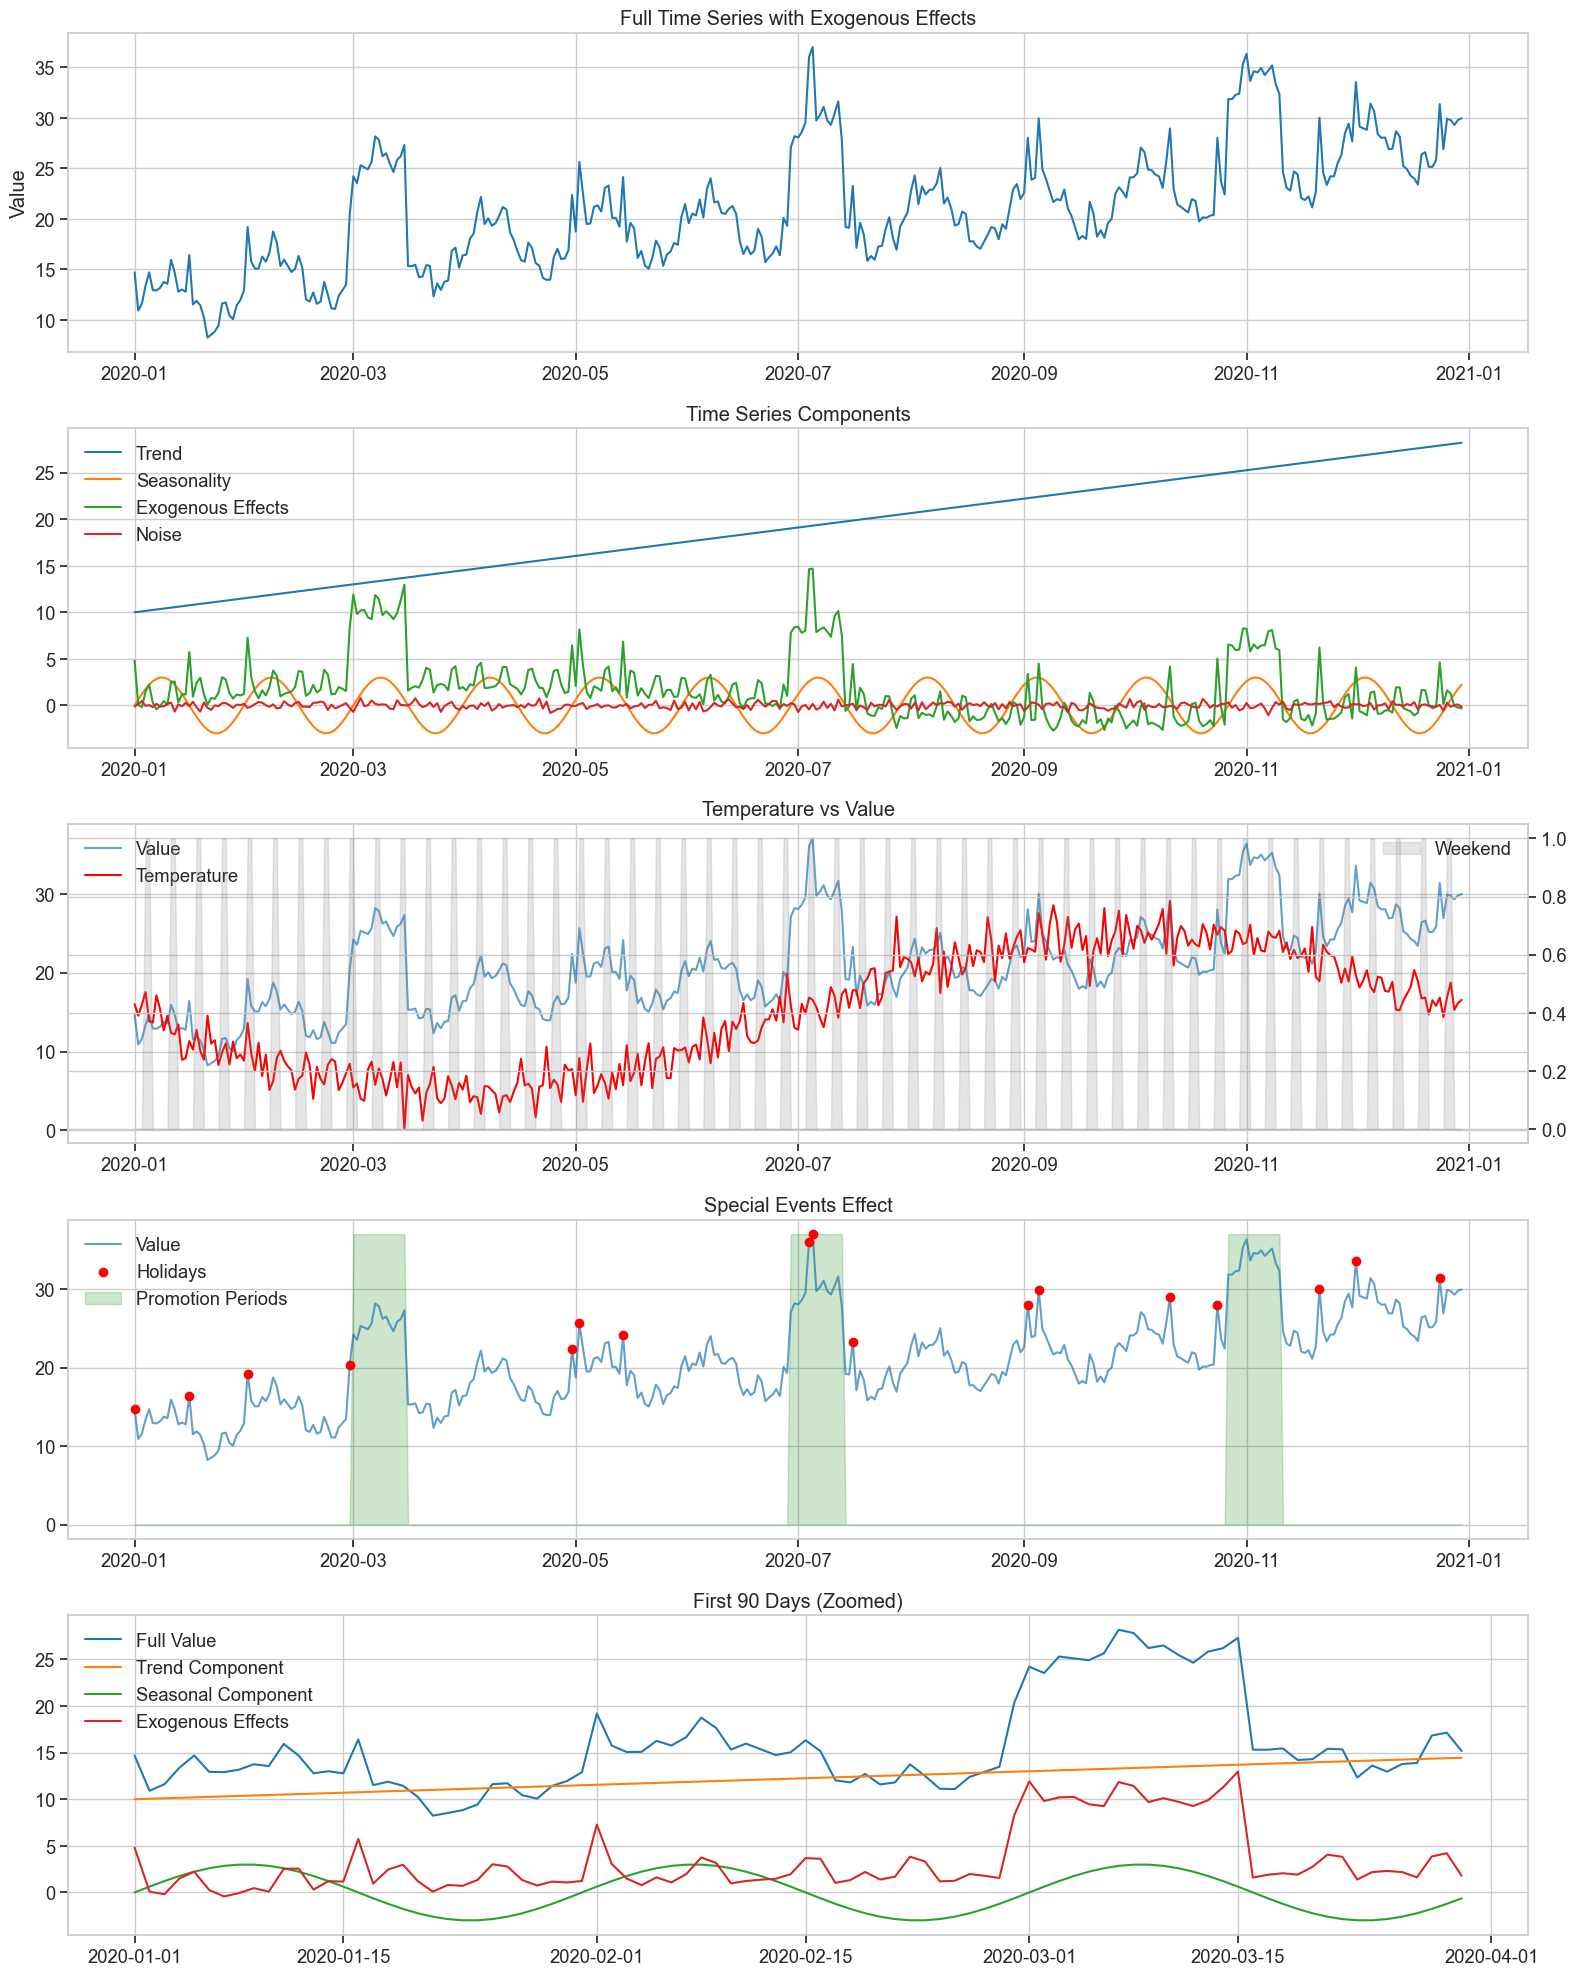

In [14]:
# Plot the data with exogenous variable effects
plt.figure(figsize=(16, 20))

# Plot 1: Full time series
plt.subplot(5, 1, 1)
plt.plot(df.index, df['value'])
plt.title('Full Time Series with Exogenous Effects')
plt.ylabel('Value')

# Plot 2: Base components
plt.subplot(5, 1, 2)
plt.plot(df.index, df['trend'], label='Trend')
plt.plot(df.index, df['seasonality'], label='Seasonality')
plt.plot(df.index, df['exog_effects'], label='Exogenous Effects')
plt.plot(df.index, df['noise'], label='Noise')
plt.title('Time Series Components')
plt.legend()

# Plot 3: Temperature effect
plt.subplot(5, 1, 3)
plt.plot(df.index, df['value'], label='Value', alpha=0.7)
plt.plot(df.index, df['temperature'], label='Temperature', color='red')
plt.title('Temperature vs Value')
plt.legend()
plt.twinx()
plt.fill_between(df.index, 0, df['is_weekend'], alpha=0.2, label='Weekend', color='gray')
plt.legend(loc='upper right')

# Plot 4: Special events
plt.subplot(5, 1, 4)
plt.plot(df.index, df['value'], label='Value', alpha=0.7)
plt.scatter(df.index[df['is_holiday'] == 1], 
           df['value'][df['is_holiday'] == 1], 
           color='red', label='Holidays', zorder=5)
plt.fill_between(df.index, 0, df['is_promotion'] * max(df['value']), 
                alpha=0.2, label='Promotion Periods', color='green')
plt.title('Special Events Effect')
plt.legend()

# Plot 5: Zoomed in view (first 90 days)
plt.subplot(5, 1, 5)
plt.plot(df.index[:90], df['value'][:90], label='Full Value')
plt.plot(df.index[:90], df['trend'][:90], label='Trend Component')
plt.plot(df.index[:90], df['seasonality'][:90], label='Seasonal Component')
plt.plot(df.index[:90], df['exog_effects'][:90], label='Exogenous Effects')
plt.title('First 90 Days (Zoomed)')
plt.legend()

plt.tight_layout()
plt.show()

Epoch [5/50], Loss: 0.0235
Epoch [10/50], Loss: 0.0176
Epoch [15/50], Loss: 0.0084
Epoch [20/50], Loss: 0.0072
Epoch [25/50], Loss: 0.0075
Epoch [30/50], Loss: 0.0077
Epoch [35/50], Loss: 0.0066
Epoch [40/50], Loss: 0.0064
Epoch [45/50], Loss: 0.0063
Epoch [50/50], Loss: 0.0058
Training completed in 4.03 seconds

LSTM Performance Metrics:
Test MSE: 9.9007
Test RMSE: 3.1465
Test MAE: 2.4850
Inference time: 0.0099 seconds


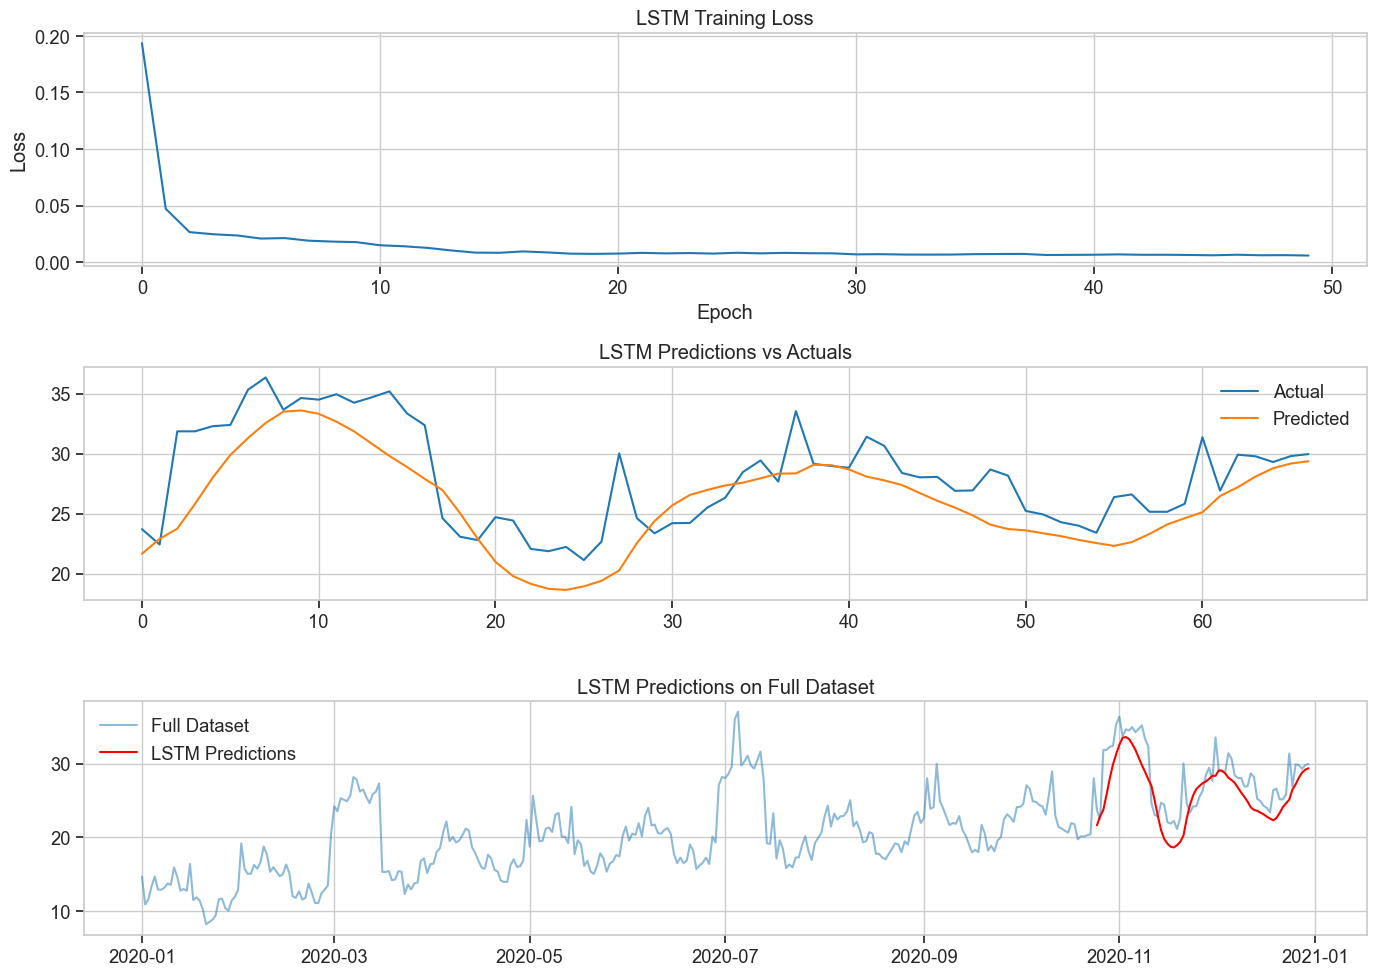

In [15]:
# Import necessary libraries for training
import torch.optim as optim
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time
from models.lstm import LSTMModel

# Create sequences function
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Parameters
sequence_length = 30  # Use 30 days of history to predict the next day
lookforward = 7  # Predict 7 days ahead (for multi-step forecasting)
test_ratio = 0.2  # 20% test split

# Scale the data
lstm_scaler = MinMaxScaler()
lstm_values_scaled = lstm_scaler.fit_transform(df[['value']].values)

# Create sequences
lstm_X, lstm_y = create_sequences(lstm_values_scaled, sequence_length)

# Split into train and test sets
lstm_test_size = int(len(lstm_X) * test_ratio)
lstm_train_size = len(lstm_X) - lstm_test_size
lstm_X_train, lstm_X_test = lstm_X[:lstm_train_size], lstm_X[lstm_train_size:]
lstm_y_train, lstm_y_test = lstm_y[:lstm_train_size], lstm_y[lstm_train_size:]

# Convert to PyTorch tensors
lstm_X_train = torch.FloatTensor(lstm_X_train)
lstm_y_train = torch.FloatTensor(lstm_y_train)
lstm_X_test = torch.FloatTensor(lstm_X_test)
lstm_y_test = torch.FloatTensor(lstm_y_test)

# Create data loaders
batch_size = 32
lstm_train_dataset = TensorDataset(lstm_X_train, lstm_y_train)
lstm_test_dataset = TensorDataset(lstm_X_test, lstm_y_test)
lstm_train_loader = DataLoader(lstm_train_dataset, batch_size=batch_size, shuffle=True)
lstm_test_loader = DataLoader(lstm_test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
input_size = 1  # Single feature (value)
lstm_model = LSTMModel(input_size=input_size, hidden_size=64, num_layers=2)
lstm_criterion = nn.MSELoss()
lstm_optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

# Training
num_epochs = 50
lstm_train_losses = []
lstm_start_time = time.time()

for epoch in range(num_epochs):
    lstm_model.train()
    lstm_running_loss = 0.0
    
    for inputs, targets in lstm_train_loader:
        # Forward pass
        lstm_outputs = lstm_model(inputs)
        lstm_loss = lstm_criterion(lstm_outputs, targets)
        
        # Backward and optimize
        lstm_optimizer.zero_grad()
        lstm_loss.backward()
        lstm_optimizer.step()
        
        lstm_running_loss += lstm_loss.item()
    
    lstm_avg_loss = lstm_running_loss / len(lstm_train_loader)
    lstm_train_losses.append(lstm_avg_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {lstm_avg_loss:.4f}')

lstm_training_time = time.time() - lstm_start_time
print(f"Training completed in {lstm_training_time:.2f} seconds")

# Evaluation
lstm_model.eval()
lstm_predictions = []
lstm_actuals = []
lstm_inference_start = time.time()

with torch.no_grad():
    for inputs, targets in lstm_test_loader:
        outputs = lstm_model(inputs)
        lstm_predictions.append(outputs.numpy())
        lstm_actuals.append(targets.numpy())
    
    # Concatenate batches
    lstm_predictions = np.concatenate(lstm_predictions)
    lstm_actuals = np.concatenate(lstm_actuals)
    
    # Inverse transform to original scale
    lstm_predictions = lstm_scaler.inverse_transform(lstm_predictions)
    lstm_actuals = lstm_scaler.inverse_transform(lstm_actuals)

lstm_inference_time = time.time() - lstm_inference_start

# Calculate metrics
lstm_mse = mean_squared_error(lstm_actuals, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(lstm_actuals, lstm_predictions)

print(f"\nLSTM Performance Metrics:")
print(f"Test MSE: {lstm_mse:.4f}")
print(f"Test RMSE: {lstm_rmse:.4f}")
print(f"Test MAE: {lstm_mae:.4f}")
print(f"Inference time: {lstm_inference_time:.4f} seconds")

# Plot results
plt.figure(figsize=(14, 10))

# Plot 1: Training loss
plt.subplot(3, 1, 1)
plt.plot(lstm_train_losses)
plt.title('LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot 2: Predictions vs actuals
plt.subplot(3, 1, 2)
plt.plot(lstm_actuals, label='Actual')
plt.plot(lstm_predictions, label='Predicted')
plt.title('LSTM Predictions vs Actuals')
plt.legend()

# Plot 3: Predictions in context of the original data
plt.subplot(3, 1, 3)
plt.plot(df.index, df['value'], label='Full Dataset', alpha=0.5)
lstm_pred_dates = df.index[sequence_length + lstm_train_size:sequence_length + lstm_train_size + len(lstm_predictions)]
plt.plot(lstm_pred_dates, lstm_predictions, label='LSTM Predictions', color='red')
plt.title('LSTM Predictions on Full Dataset')
plt.legend()

plt.tight_layout()
plt.show()

# Store results for later comparison
lstm_results = {
    'model': 'LSTM',
    'mse': lstm_mse,
    'rmse': lstm_rmse,
    'mae': lstm_mae,
    'training_time': lstm_training_time,
    'inference_time': lstm_inference_time,
    'predictions': lstm_predictions,
    'actuals': lstm_actuals,
    'prediction_dates': lstm_pred_dates
}

In [ ]:
# Import necessary libraries for N-BEATS testing
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time
import matplotlib.pyplot as plt
from models.nbeatsx_v4 import NBeatsX

# 1. Prepare data for N-BEATS-X
print("Preparing data for N-BEATS-X model...")

# Parameters for N-BEATS-X
nbeats_lookback = 30       # History window size
nbeats_forecast_horizon = 7 # Prediction horizon
nbeats_test_ratio = 0.2    # Test set size
batch_size = 32

# Separate target and exogenous variables
target_col = 'value'
exog_cols = ['temperature', 'is_weekend', 'is_holiday', 'is_promotion',
             'day_of_week_sin', 'day_of_week_cos', 'day_of_month_sin', 
             'day_of_month_cos', 'month_sin', 'month_cos']

# Scale target variable
nbeats_scaler_y = StandardScaler()
nbeats_y_scaled = nbeats_scaler_y.fit_transform(df[[target_col]].values)

# Scale exogenous variables
nbeats_scaler_x = StandardScaler()
nbeats_exog_scaled = nbeats_scaler_x.fit_transform(df[exog_cols].values)

# Create sequences function with exogenous variables
def create_nbeats_sequences(data, exog_data, lookback, horizon):
    X, y, X_exog = [], [], []
    for i in range(len(data) - lookback - horizon + 1):
        X.append(data[i:i+lookback, 0])  # Input sequence
        y.append(data[i+lookback:i+lookback+horizon, 0])  # Target sequence
        X_exog.append(exog_data[i:i+lookback])  # Exogenous variables for the input sequence
    return np.array(X), np.array(y), np.array(X_exog)

# Create sequences
nbeats_X, nbeats_y, nbeats_X_exog = create_nbeats_sequences(
    nbeats_y_scaled, nbeats_exog_scaled, nbeats_lookback, nbeats_forecast_horizon)

# Split into train and test sets
nbeats_test_size = int(len(nbeats_X) * nbeats_test_ratio)
nbeats_train_size = len(nbeats_X) - nbeats_test_size

nbeats_X_train = nbeats_X[:nbeats_train_size]
nbeats_y_train = nbeats_y[:nbeats_train_size]
nbeats_X_exog_train = nbeats_X_exog[:nbeats_train_size]

nbeats_X_test = nbeats_X[nbeats_train_size:]
nbeats_y_test = nbeats_y[nbeats_train_size:]
nbeats_X_exog_test = nbeats_X_exog[nbeats_train_size:]

# Convert to PyTorch tensors
nbeats_X_train_tensor = torch.FloatTensor(nbeats_X_train).unsqueeze(-1)  # Add feature dimension
nbeats_y_train_tensor = torch.FloatTensor(nbeats_y_train)
nbeats_X_exog_train_tensor = torch.FloatTensor(nbeats_X_exog_train)

nbeats_X_test_tensor = torch.FloatTensor(nbeats_X_test).unsqueeze(-1)
nbeats_y_test_tensor = torch.FloatTensor(nbeats_y_test)
nbeats_X_exog_test_tensor = torch.FloatTensor(nbeats_X_exog_test)

# Create data loaders
nbeats_train_dataset = TensorDataset(nbeats_X_train_tensor, nbeats_y_train_tensor, nbeats_X_exog_train_tensor)
nbeats_test_dataset = TensorDataset(nbeats_X_test_tensor, nbeats_y_test_tensor, nbeats_X_exog_test_tensor)

nbeats_train_loader = DataLoader(nbeats_train_dataset, batch_size=batch_size, shuffle=True)
nbeats_test_loader = DataLoader(nbeats_test_dataset, batch_size=batch_size, shuffle=False)

print(f"Data prepared: {nbeats_train_size} training samples, {nbeats_test_size} test samples")
print(f"Input shape: {nbeats_X_train_tensor.shape}, Target shape: {nbeats_y_train_tensor.shape}")
print(f"Exogenous shape: {nbeats_X_exog_train_tensor.shape}")

# 2. Initialize and train the N-BEATS-X model
print("\nInitializing N-BEATS-X model...")

# Initialize the N-BEATS-X model
nbeats_model = NBeatsX(
    input_size=nbeats_lookback,
    forecast_size=nbeats_forecast_horizon,
    exog_size=len(exog_cols),
    stack_types=['trend', 'seasonality', 'generic'],
    num_blocks_per_stack=[2, 2, 1],  # 2 trend, 2 seasonality, 1 generic
    hidden_units=64,
    layers=2,
    trend_degree=3,
    seasonality_harmonics=5,
    dropout=0.1,
)

# Loss function and optimizer
nbeats_criterion = nn.MSELoss()
nbeats_optimizer = optim.Adam(nbeats_model.parameters(), lr=0.001)

# Training
num_epochs = 50
nbeats_train_losses = []
nbeats_start_time = time.time()

print("Starting training...")
for epoch in range(num_epochs):
    nbeats_model.train()
    nbeats_running_loss = 0.0
    
    for inputs, targets, exog in nbeats_train_loader:
        # Forward pass
        nbeats_outputs = nbeats_model(inputs, exog)
        nbeats_loss = nbeats_criterion(nbeats_outputs, targets)
        
        # Backward and optimize
        nbeats_optimizer.zero_grad()
        nbeats_loss.backward()
        nbeats_optimizer.step()
        
        nbeats_running_loss += nbeats_loss.item()
    
    nbeats_avg_loss = nbeats_running_loss / len(nbeats_train_loader)
    nbeats_train_losses.append(nbeats_avg_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {nbeats_avg_loss:.4f}')

nbeats_training_time = time.time() - nbeats_start_time
print(f"Training completed in {nbeats_training_time:.2f} seconds")

# 3. Evaluation with component decomposition
print("\nEvaluating model and decomposing predictions...")
nbeats_model.eval()
nbeats_predictions = []
nbeats_actuals = []
nbeats_components_trend = []
nbeats_components_seasonality = []
nbeats_components_generic = []
nbeats_inference_start = time.time()

with torch.no_grad():
    for inputs, targets, exog in nbeats_test_loader:
        # Get prediction and components
        outputs, components = nbeats_model(inputs, exog, return_components=True)
        
        # Store predictions
        nbeats_predictions.append(outputs.numpy())
        nbeats_actuals.append(targets.numpy())
        
        # Store components
        nbeats_components_trend.append(components[0].numpy())      # Trend component
        nbeats_components_seasonality.append(components[1].numpy()) # Seasonality component
        nbeats_components_generic.append(components[2].numpy())     # Generic component

nbeats_inference_time = time.time() - nbeats_inference_start

# Concatenate batches
nbeats_predictions = np.concatenate(nbeats_predictions)
nbeats_actuals = np.concatenate(nbeats_actuals)
nbeats_components_trend = np.concatenate(nbeats_components_trend)
nbeats_components_seasonality = np.concatenate(nbeats_components_seasonality)
nbeats_components_generic = np.concatenate(nbeats_components_generic)

# Inverse transform to original scale
nbeats_predictions_orig = nbeats_scaler_y.inverse_transform(nbeats_predictions.reshape(-1, 1)).reshape(nbeats_predictions.shape)
nbeats_actuals_orig = nbeats_scaler_y.inverse_transform(nbeats_actuals.reshape(-1, 1)).reshape(nbeats_actuals.shape)
nbeats_components_trend_orig = nbeats_scaler_y.inverse_transform(nbeats_components_trend.reshape(-1, 1)).reshape(nbeats_components_trend.shape)
nbeats_components_seasonality_orig = nbeats_scaler_y.inverse_transform(nbeats_components_seasonality.reshape(-1, 1)).reshape(nbeats_components_seasonality.shape)
nbeats_components_generic_orig = nbeats_scaler_y.inverse_transform(nbeats_components_generic.reshape(-1, 1)).reshape(nbeats_components_generic.shape)

# 4. Calculate metrics
nbeats_mse = mean_squared_error(nbeats_actuals_orig.reshape(-1), nbeats_predictions_orig.reshape(-1))
nbeats_rmse = np.sqrt(nbeats_mse)
nbeats_mae = mean_absolute_error(nbeats_actuals_orig.reshape(-1), nbeats_predictions_orig.reshape(-1))

print(f"\nN-BEATS-X Performance Metrics:")
print(f"Test MSE: {nbeats_mse:.4f}")
print(f"Test RMSE: {nbeats_rmse:.4f}")
print(f"Test MAE: {nbeats_mae:.4f}")
print(f"Inference time: {nbeats_inference_time:.4f} seconds")

# 5. Visualize results
fig = plt.figure(figsize=(16, 20))

# Plot 1: Training loss
plt.subplot(5, 1, 1)
plt.plot(nbeats_train_losses)
plt.title('N-BEATS-X Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot 2: Sample predictions vs actuals
plt.subplot(5, 1, 2)
# Plot first 5 samples for clarity
for i in range(min(5, len(nbeats_actuals_orig))):
    plt.plot(nbeats_actuals_orig[i], label=f'Actual {i+1}' if i == 0 else "", alpha=0.7)
    plt.plot(nbeats_predictions_orig[i], label=f'Predicted {i+1}' if i == 0 else "", linestyle='--', alpha=0.7)
plt.title('N-BEATS-X Predictions vs Actuals (Sample)')
plt.legend()

# Plot 3: Component decomposition for a single example
plt.subplot(5, 1, 3)
example_idx = 0  # First example
plt.plot(nbeats_predictions_orig[example_idx], label='Total Forecast', linewidth=2)
plt.plot(nbeats_components_trend_orig[example_idx], label='Trend Component', linestyle='--')
plt.plot(nbeats_components_seasonality_orig[example_idx], label='Seasonality Component', linestyle='-.')
plt.plot(nbeats_components_generic_orig[example_idx], label='Generic Component', linestyle=':')
plt.title('N-BEATS-X Component Decomposition (Example)')
plt.legend()

# Plot 4: Model interpretation - component importance
plt.subplot(5, 1, 4)
# Calculate average absolute contribution of each component
avg_trend = np.mean(np.abs(nbeats_components_trend_orig))
avg_seasonality = np.mean(np.abs(nbeats_components_seasonality_orig))
avg_generic = np.mean(np.abs(nbeats_components_generic_orig))
components = ['Trend', 'Seasonality', 'Generic (Exogenous)']
importances = [avg_trend, avg_seasonality, avg_generic]

plt.bar(components, importances)
plt.title('N-BEATS-X Component Importance')
plt.ylabel('Average Absolute Contribution')

# Plot 5: Predictions in context of original data
plt.subplot(5, 1, 5)
plt.plot(df.index, df['value'], label='Full Dataset', alpha=0.5)
# Calculate prediction dates
nbeats_pred_dates = df.index[nbeats_lookback + nbeats_train_size:nbeats_lookback + nbeats_train_size + len(nbeats_predictions)]
# Flatten predictions for plotting
flat_predictions = nbeats_predictions_orig.reshape(-1)
# Plot predictions
plt.plot(nbeats_pred_dates, flat_predictions, label='N-BEATS-X Predictions', color='red')
plt.title('N-BEATS-X Predictions on Full Dataset')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Analyze exogenous variable importance
print("\nExogenous Variable Analysis:")
# Train a simple model with only one component type to isolate exogenous effects
generic_only_model = NBeatsX(
    input_size=nbeats_lookback,
    forecast_size=nbeats_forecast_horizon,
    exog_size=len(exog_cols),
    stack_types=['generic'],
    num_blocks_per_stack=[3],  # Only generic blocks
    hidden_units=64,
    layers=2,
    dropout=0.1,
)

# Quick training for analysis
generic_optimizer = optim.Adam(generic_only_model.parameters(), lr=0.001)
for epoch in range(10):  # Just 10 epochs for analysis
    generic_only_model.train()
    for inputs, targets, exog in nbeats_train_loader:
        outputs = generic_only_model(inputs, exog)
        loss = nbeats_criterion(outputs, targets)
        generic_optimizer.zero_grad()
        loss.backward()
        generic_optimizer.step()

# Test with exog vs. without exog
generic_only_model.eval()
with torch.no_grad():
    # With exogenous variables
    with_exog_preds = []
    # Without exogenous variables (zero tensor)
    no_exog_preds = []
    
    for inputs, targets, exog in nbeats_test_loader:
        # With exogenous variables
        outputs_with_exog = generic_only_model(inputs, exog)
        with_exog_preds.append(outputs_with_exog.numpy())
        
        # Without exogenous variables
        zero_exog = torch.zeros_like(exog)
        outputs_no_exog = generic_only_model(inputs, zero_exog)
        no_exog_preds.append(outputs_no_exog.numpy())
    
    with_exog_preds = np.concatenate(with_exog_preds)
    no_exog_preds = np.concatenate(no_exog_preds)
    
    # Calculate difference to measure exogenous variable impact
    exog_impact = with_exog_preds - no_exog_preds
    exog_impact_magnitude = np.mean(np.abs(exog_impact), axis=(0, 1))
    print(f"Average magnitude of exogenous variable impact: {exog_impact_magnitude:.4f}")

# Store results for later comparison
nbeats_results = {
    'model': 'N-BEATS-X',
    'mse': nbeats_mse,
    'rmse': nbeats_rmse,
    'mae': nbeats_mae,
    'training_time': nbeats_training_time,
    'inference_time': nbeats_inference_time,
    'predictions': nbeats_predictions_orig,
    'actuals': nbeats_actuals_orig,
    'prediction_dates': nbeats_pred_dates,
    'components': {
        'trend': nbeats_components_trend_orig,
        'seasonality': nbeats_components_seasonality_orig,
        'generic': nbeats_components_generic_orig
    }
}

print("\nN-BEATS-X modeling completed successfully!")

Preparing data for N-BEATS-X model...
Data prepared: 264 training samples, 65 test samples
Input shape: torch.Size([264, 30, 1]), Target shape: torch.Size([264, 7])
Exogenous shape: torch.Size([264, 30, 10])

Initializing N-BEATS-X model...


NameError: name 'NBeatsX' is not defined

|